In [1]:
from math import log, pi, cosh, sin, tanh, cos
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import copy
from sklearn import linear_model

In [2]:
logsfolder = r'..\Calculations\Basic'
imagesfolder = r'..\Plots'
nns = [5, 10, 15, 25, 50, 65, 85, 100]
nncolors=['darkviolet', 'royalblue', 'crimson', 'orange', 'green', 'black', 'darkred', 'yellow']
lrs = [0.2, 0.4, 0.6, 0.8, 1.0]
lrcolors=['darkviolet', 'royalblue', 'crimson', 'orange', 'green']
overloadednndatas = dict();
overloadedlrdatas = dict();

In [3]:
thistype = {'formats': ('i4', 'i4', 'f2', 'f4', 'f4', 'f4', 'f4', 'S4', 'f2')}
thesenames = ('nnodes', 'nframes', 'tgen', 'texec', 'tmean', 'tstd', 'trpt', 'load', 'loadrate')

fulldata = pd.DataFrame(columns=thesenames)

for nn in nns:
    nndata = pd.read_table(r'%s\%s.txt' %(logsfolder, nn), sep=' ', dtype=thistype, names=thesenames);
    overloadednndata = nndata[nndata['load']=='overloaded']
    fulldata = fulldata.append(overloadednndata)    
    overloadednndatas[nn] = overloadednndata

for lr in lrs:
    overloadedlrdatas[lr] = fulldata[fulldata['loadrate']==lr]  

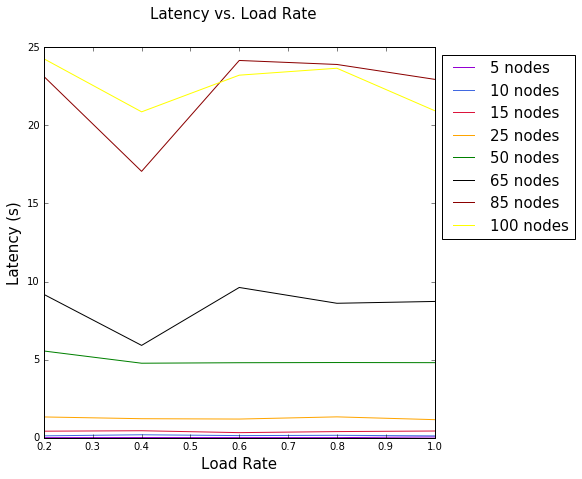

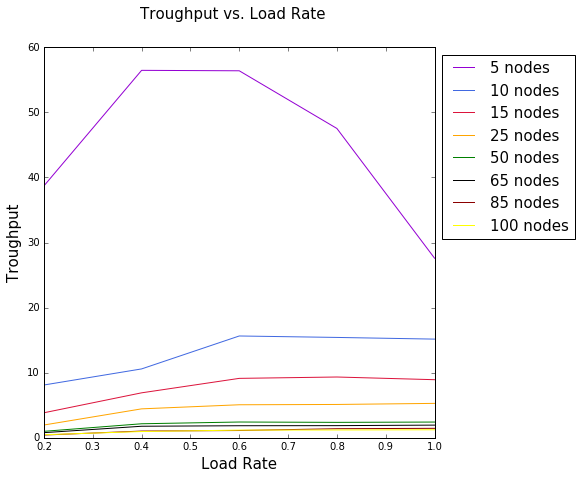

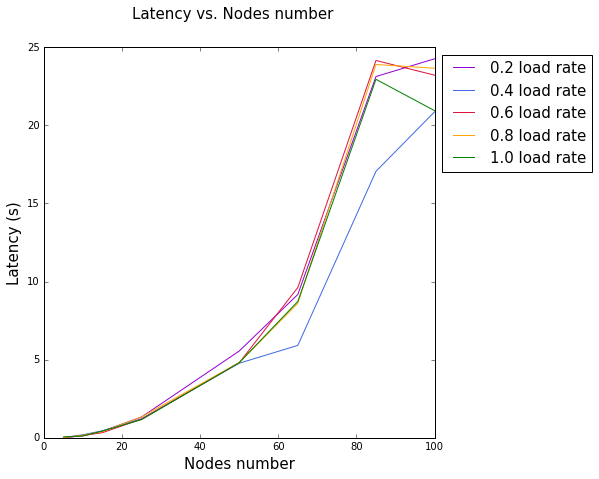

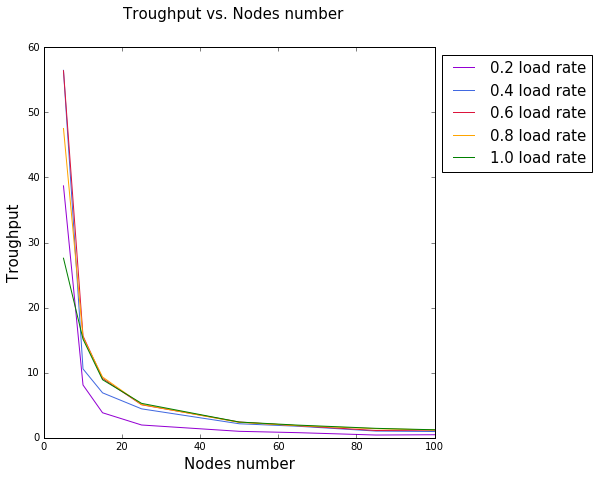

In [5]:
plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1.1])
for nn, color in zip(nns, nncolors):
    loadrate = overloadednndatas[nn]['loadrate']
    latency = overloadednndatas[nn]['tmean']
    std = overloadednndatas[nn]['tstd']
    plt.plot(loadrate, latency, color = color, linewidth=1.0, label=r'%s nodes' %(nn))
#     plt.errorbar(loadrate, latency, std, color = color, linewidth=1.0, label=r'%s nodes' %(nn))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.suptitle(r'Latency vs. Load Rate', fontsize=15)
plt.xlabel(r'Load Rate', fontsize=15)
plt.ylabel(r'Latency (s)', fontsize=15)
plt.savefig(r'%s\Latency vs. Load Rate.png' %(imagesfolder), dpi=200, bbox_inches='tight', pad_inches=0.2)

xytraj = plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1])
for nn, color in zip(nns, nncolors):
    loadrate = overloadednndatas[nn]['loadrate']
    throughput = overloadednndatas[nn]['trpt']
    plt.plot(loadrate, throughput, color = color, linewidth=1.0, label=r'%s nodes' %(nn))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', title="", ncol=1, fontsize=15)
plt.suptitle(r'Troughput vs. Load Rate', fontsize=15)
plt.xlabel(r'Load Rate', fontsize=15)
plt.ylabel(r'Troughput', fontsize=15)
plt.savefig(r'%s\Troughput vs. Load Rate.png' %(imagesfolder), dpi=200, bbox_inches='tight', pad_inches=0.2)

plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1.1])
for lr, color in zip(lrs, lrcolors):
    nnodes = overloadedlrdatas[lr]['nnodes']
    latency = overloadedlrdatas[lr]['tmean']
    std = overloadedlrdatas[lr]['tstd']
    plt.plot(nnodes, latency, color = color, linewidth=1.0, label=r'%s load rate' %(lr))
#     plt.errorbar(nnodes, latency, color = color, linewidth=1.0, label=r'%s load rate' %(lr))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.suptitle(r'Latency vs. Nodes number', fontsize=15)
plt.xlabel(r'Nodes number', fontsize=15)
plt.ylabel(r'Latency (s)', fontsize=15)
plt.savefig(r'%s\Latency vs. Nodes number.png' %(imagesfolder), dpi=200, bbox_inches='tight', pad_inches=0.2)

plt.figure(figsize=(7,7))
ax = plt.axes()
# ax.set(xlim=[0, 1.1])
for lr, color in zip(lrs, lrcolors):
    nnodes = overloadedlrdatas[lr]['nnodes']
    troughput = overloadedlrdatas[lr]['trpt']
    plt.plot(nnodes, troughput, color = color, linewidth=1.0, label=r'%s load rate' %(lr))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.suptitle(r'Troughput vs. Nodes number', fontsize=15)
plt.xlabel(r'Nodes number', fontsize=15)
plt.ylabel(r'Troughput', fontsize=15)
plt.savefig(r'%s\Troughput vs. Nodes number.png' %(imagesfolder), dpi=200, bbox_inches='tight', pad_inches=0.2)

In [10]:
thtlogsfolder = r'..\Calculations\THT'
imagesfolder = r'..\Plots'
nn = 15

# lrs = [0.067, 0.133, 0.2, 0.267, 0.333, 0.4, 0.467,, 0.533, 0.6, 0.667, 0.733, 0.8, 0.867, 0.933, 1]
lrsunder = [0.067, 0.133, 0.2, 0.267]
lrsover = [0.8, 0.867, 0.933, 1]
lrundercolors=['darkviolet', 'royalblue', 'crimson', 'orange', 'green', 'black', 'darkred', 'yellow']
lrovercolors=['green', 'black', 'darkred', 'yellow']
overloadednndatas = dict();
lrdatas = dict();
print type(lrsunder)

thistype = {'formats': ('i4', 'i4', 'f2', 'f4', 'f4', 'f4', 'f4', 'S4', 'f2', 'f4', 'f2')}
thesenames = ('nnodes', 'nframes', 'tgen', 'texec', 'tmean', 'tstd', 'trpt', 'load', 'loadrate', 'meant', 'thtmult')

<type 'list'>


In [12]:
thtfulldata = pd.DataFrame(columns=thesenames)

for lr in lrsunder+lrsover:
    lrdata = pd.read_table(r'%s\15-%s-THT.txt' %(thtlogsfolder, lr), sep=' ', dtype=thistype, names=thesenames);
    overloadedlrdata = lrdata[lrdata['load']=='overloaded']
    thtfulldata = thtfulldata.append(overloadedlrdata)    
    lrdatas[lr] = overloadedlrdata

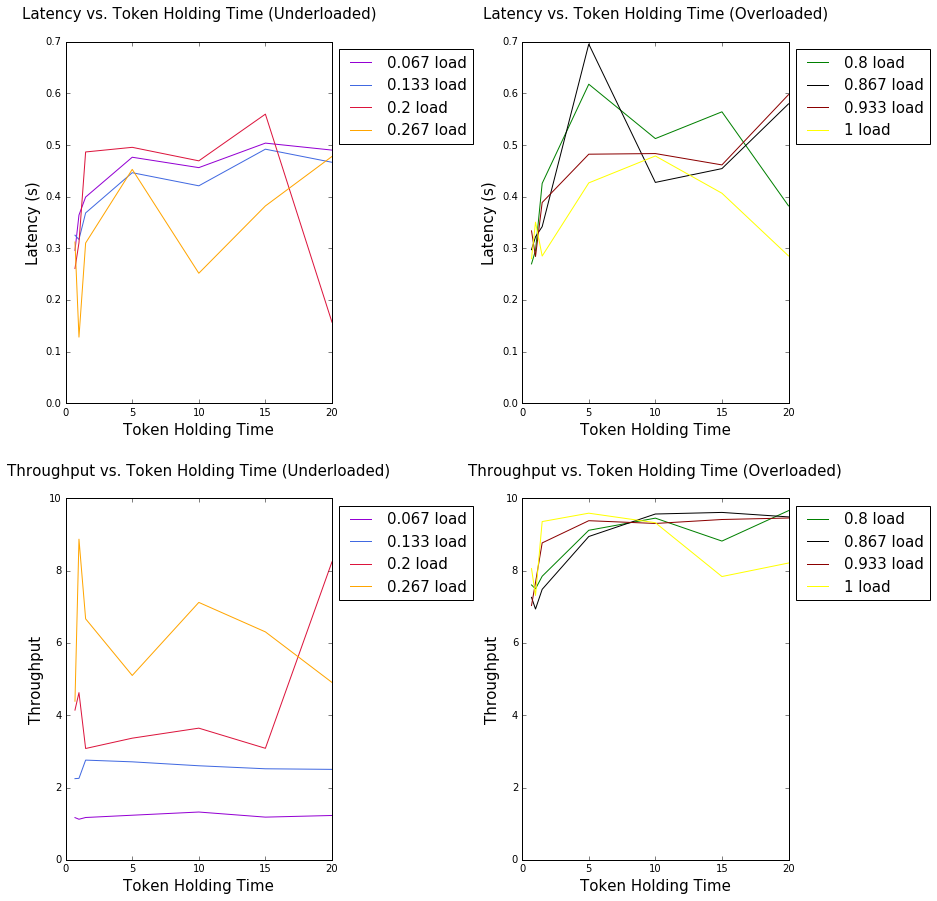

In [45]:
plt.figure(figsize=(15,15))

ax = plt.subplot(2, 2, 1)
ax.set(ylim=[0, 0.7])
for lr, color in zip (lrsunder, lrundercolors):
    thtmult = lrdatas[lr]['thtmult']
    latency = lrdatas[lr]['tmean']
    plt.plot(thtmult, latency, color = color, linewidth=1.0, label=r'%s load' %(lr))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height * 0.95])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.title(r'Latency vs. Token Holding Time (Underloaded)', fontsize=15, position=(0.5,1.05))
plt.xlabel(r'Token Holding Time', fontsize=15)
plt.ylabel(r'Latency (s)', fontsize=15)

ax = plt.subplot(2, 2, 2)
ax.set(ylim=[0, 0.7])
for lr, color in zip (lrsover, lrovercolors):
    thtmult = lrdatas[lr]['thtmult']
    latency = lrdatas[lr]['tmean']
    plt.plot(thtmult, latency, color = color, linewidth=1.0, label=r'%s load' %(lr))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height * 0.95])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.title(r'Latency vs. Token Holding Time (Overloaded)', fontsize=15, position=(0.5,1.05))
plt.xlabel(r'Token Holding Time', fontsize=15)
plt.ylabel(r'Latency (s)', fontsize=15)

ax = plt.subplot(2, 2, 3)
ax.set(ylim=[0, 10])
for lr, color in zip (lrsunder, lrundercolors):
    thtmult = lrdatas[lr]['thtmult']
    latency = lrdatas[lr]['trpt']
    plt.plot(thtmult, latency, color = color, linewidth=1.0, label=r'%s load' %(lr))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height * 0.95])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.title(r'Throughput vs. Token Holding Time (Underloaded)', fontsize=15, position=(0.5,1.05))
plt.xlabel(r'Token Holding Time', fontsize=15)
plt.ylabel(r'Throughput', fontsize=15)

ax = plt.subplot(2, 2, 4)
ax.set(ylim=[0, 10])
for lr, color in zip (lrsover, lrovercolors):
    thtmult = lrdatas[lr]['thtmult']
    latency = lrdatas[lr]['trpt']
    plt.plot(thtmult, latency, color = color, linewidth=1.0, label=r'%s load' %(lr))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.7, box.height * 0.95])
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1, fontsize=15)
plt.title(r'Throughput vs. Token Holding Time (Overloaded)', fontsize=15, position=(0.5,1.05))
plt.xlabel(r'Token Holding Time', fontsize=15)
plt.ylabel(r'Throughput', fontsize=15)

plt.savefig(r'%s\Token Holding Time.png' %(imagesfolder), dpi=200, bbox_inches='tight', pad_inches=0.2)
    